# Dependencies

In [1]:
import os
import subprocess
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from datacollect import *

# Config

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
cm = 1 / 2.54

# Input parameters

In [3]:
# Dataset
year = 2018

# Input Dir (Simulations)
path_simulation = f'/Users/kristianboerger/working_files/ledsa/simulation/2018/'

# Experimental Data
simulation = 'V001' # relevant for simulation data

# Output Dir
path_output = 'video'

# Get data

In [4]:
path_cam_01 = os.path.join(path_simulation, simulation, 'Cam_01')
path_cam_02 = os.path.join(path_simulation, simulation, 'Cam_02')

sim_cam01 = SimData(path_cam_01)
sim_cam02 = SimData(path_cam_02)

# Generate single image

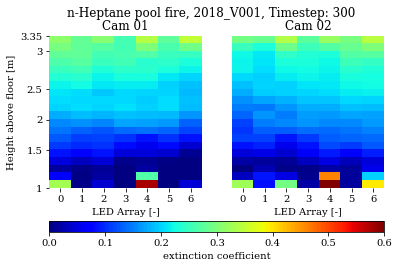

In [5]:
channel = 0 # Channel to analyse
timestep = 300 # Timestep to analyse
window_sim = 10 # Average window for simulation
min_layer = 0 # Bottom Layer
max_layer = 20 # Top Layer

n_layers = max_layer - min_layer
yticklabels = [1,1.5,2,2.5,3,3.35]
yticks = []
for height in yticklabels:
    yticks.append(get_layer_from_height(1,3.35,height,20))

def plot_heatmap():
    i = 0
    while i<3:
        try:
            extco_cam01 = sim_cam01.get_extco_at_timestep(channel=channel,timestep=timestep+i, window=window_sim).loc[min_layer:max_layer,:]
        except:
            pass
        i+=1
    i = 0
    while i<3:
        try:
            extco_cam02 = sim_cam02.get_extco_at_timestep(channel=channel,timestep=timestep+i, window=window_sim).loc[min_layer:max_layer,:]
        except:
            pass
        i+=1


    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1 = sns.heatmap(extco_cam01, ax=ax1, cmap='jet', vmin=0, vmax=0.6, cbar=False)
    ax2 = sns.heatmap(extco_cam02, ax=ax2, cmap='jet', vmin=0, vmax=0.6, cbar=False)
    mappable = ax1.get_children()[0]
    plt.colorbar(mappable, ax = [ax1,ax2],orientation = 'horizontal', label="extinction coefficient", aspect=30)

    fig.suptitle(f"n-Heptane pool fire, {year}_{simulation}, Timestep: {timestep}")
    ax1.set_title("Cam 01")
    ax2.set_title("Cam 02")
    ax1.set_xlabel("LED Array [-]")
    ax2.set_xlabel("LED Array [-]")
    ax1.set_ylabel("Height above floor [m]")
    ax2.yaxis.set_visible(False)
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(yticklabels)

plot_heatmap()

# Generate video from image sequence

<ipython-input-5-b6aaf013e7cc>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)


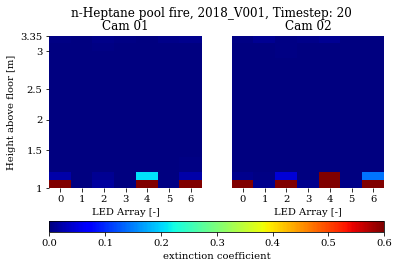

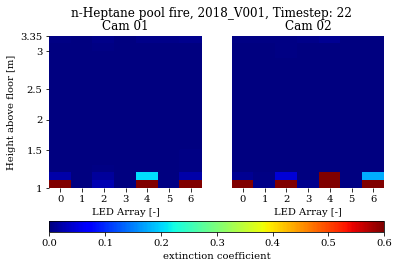

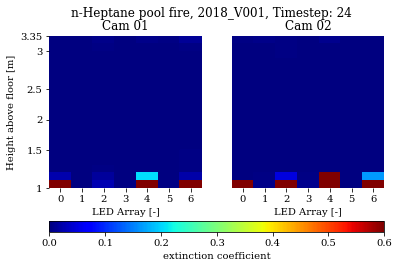

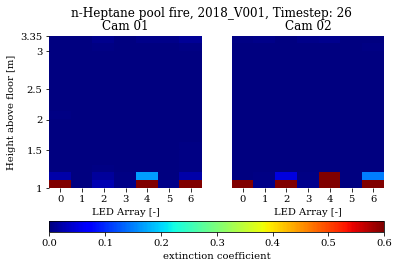

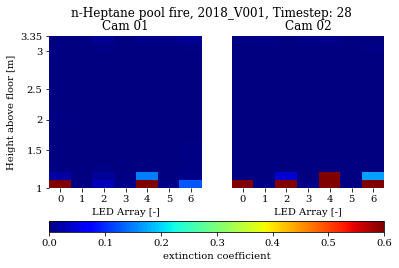

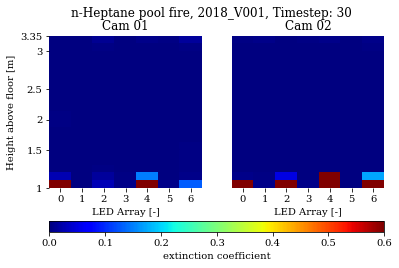

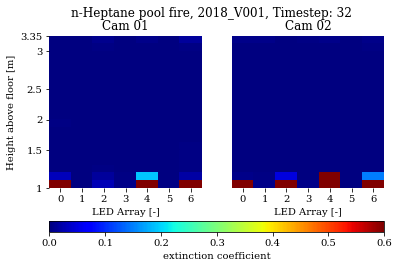

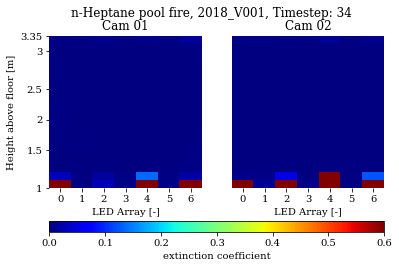

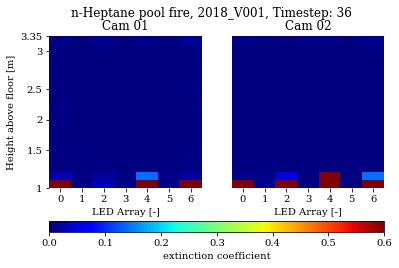

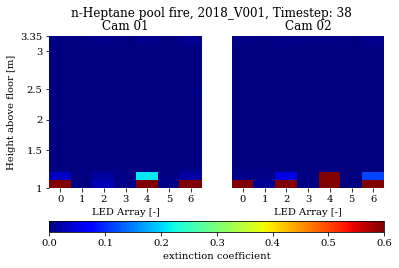

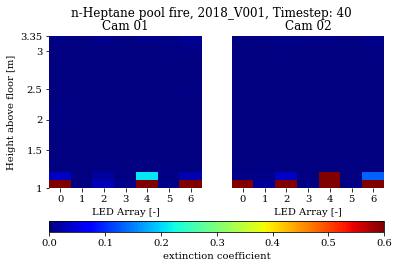

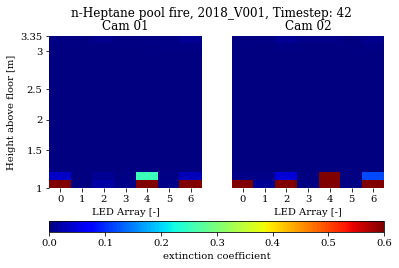

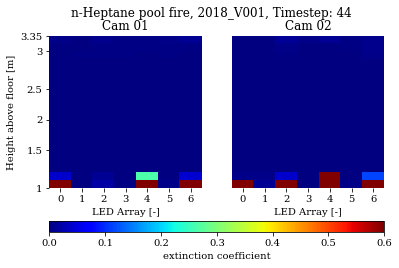

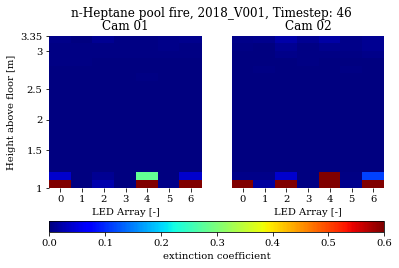

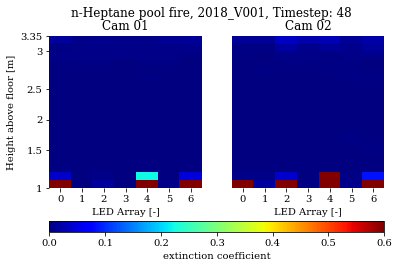

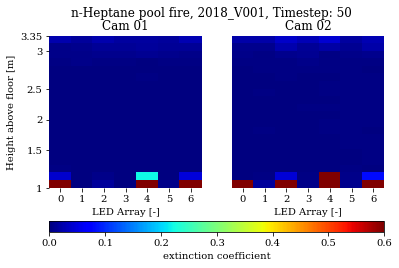

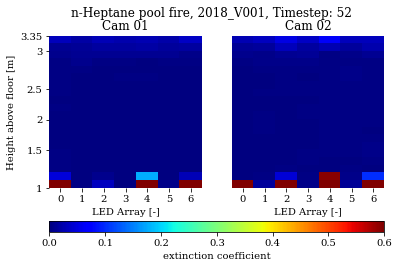

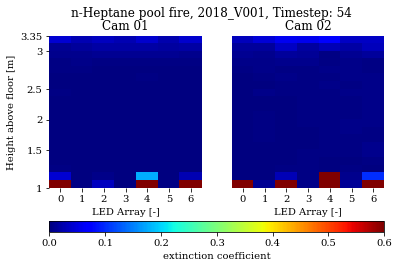

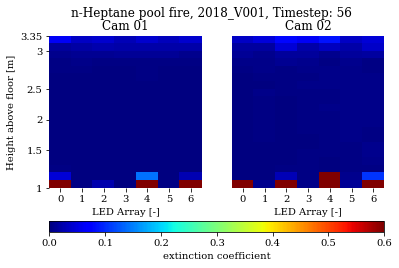

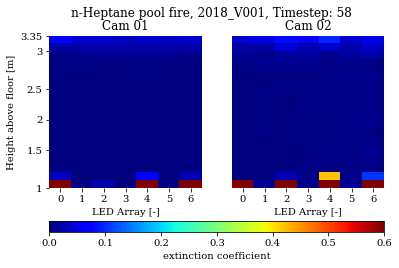

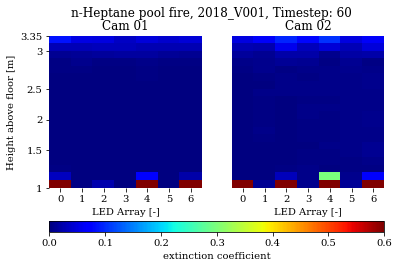

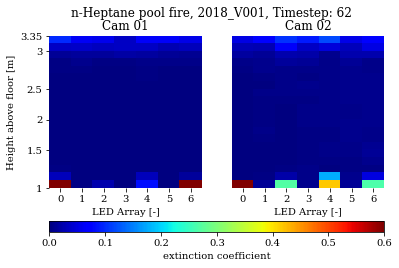

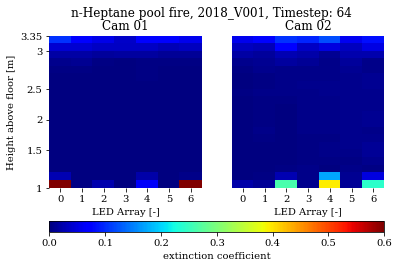

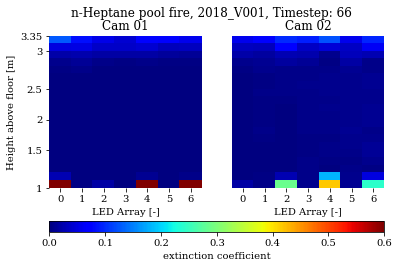

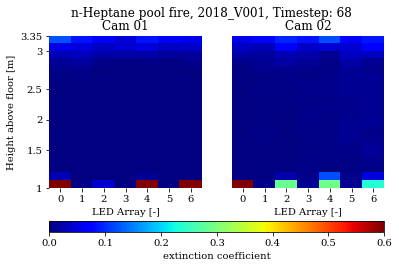

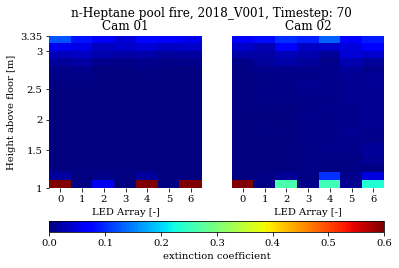

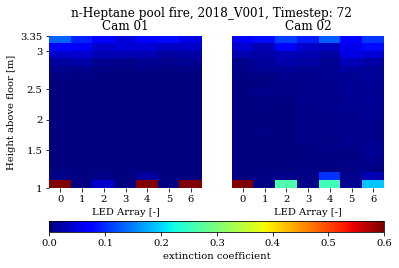

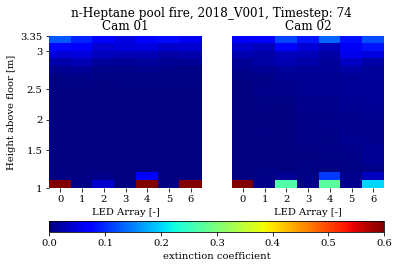

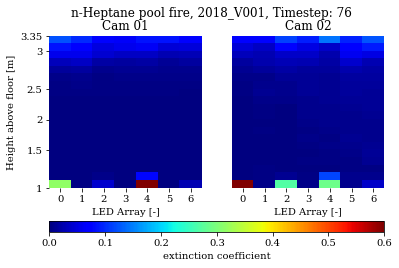

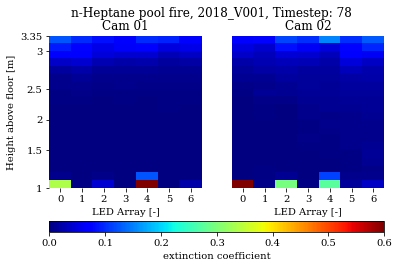

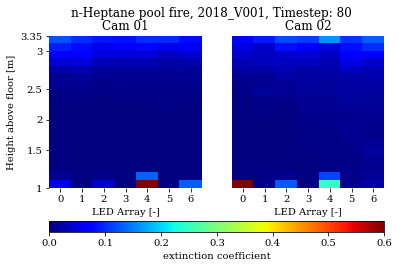

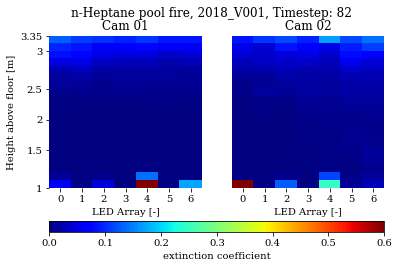

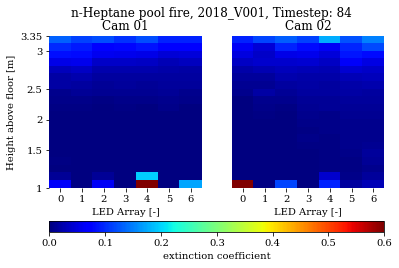

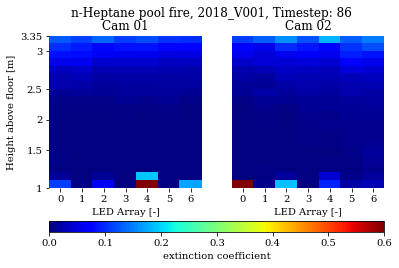

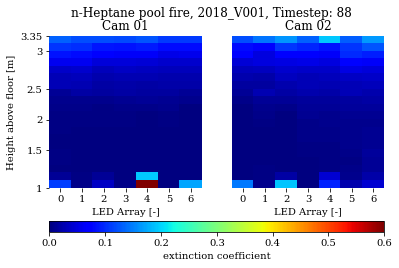

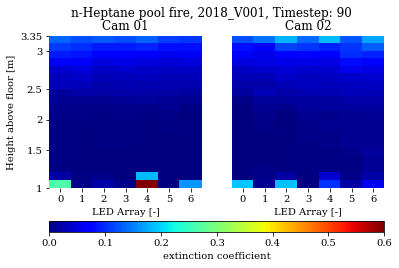

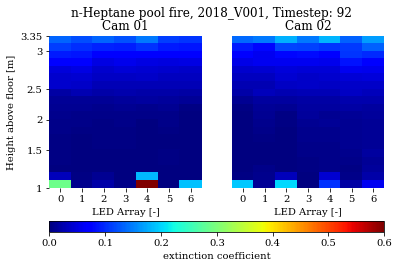

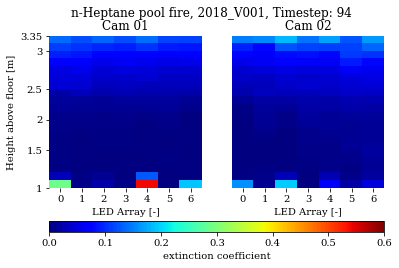

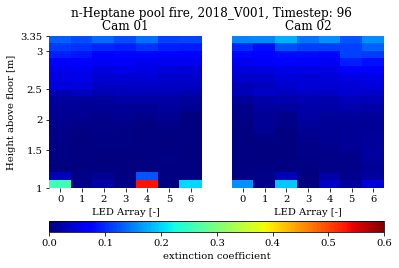

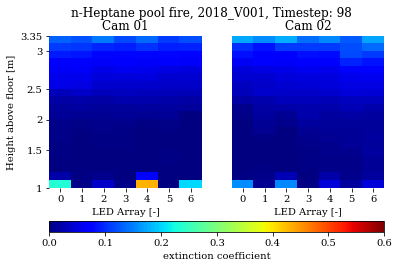

In [10]:
timesteps = range(20,100,2)
os.chdir(path_output)
for i, timestep in enumerate(timesteps):
    plot_heatmap()
    file = "file%03d.png" % i
    plt.savefig(file, dpi=300, bbox_inches = 'tight')

subprocess.call([
    'ffmpeg', '-framerate', '8', '-i', 'file%03d.png', '-r', '30', '-s', '1280x720', '-pix_fmt', 'yuv420p',
    'extco_video.mp4'])

for file_name in glob.glob("*.png"):
    os.remove(file_name)
os.chdir("../")